<a href="https://colab.research.google.com/github/ferbator/data-engineering/blob/main/M33071_%D0%9A%D0%B0%D1%80%D0%B5%D0%BF%D0%B8%D0%BD_%22lab7_2%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

На практике построим нейронную сеть для классификации картиной. В качестве входных данных используются картинки одежды (в градациях серого, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [ ]:
# !pip install torchvision

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

Скачаем обучающую и контрольную выборки.

In [ ]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=None)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=None)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

<h2 style="text-align: center;"><b>Задание</b></h2>

Посмотрите на датасет.
* Сколько картинок в train? В test?
* Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем `train_data` у переменной `trainset`)? в test?
* Выведите несколько картинок с помощью `pyplot`

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1.  Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет
2. Свёрточную сеть, классифицирующую этот датасет
3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

In [ ]:
classes = {
    0:'T-shirt/top',
    1: 'Trouser', 
    2: 'Pullover', 
    3: 'Dress', 
    4: 'Coat', 
    5: 'Sandal', 
    6: 'Shirt', 
    7: 'Sneaker', 
    8: 'Bag', 
    9: 'Ankle boot'}

In [ ]:
print("Картинок в train: ", testloader.dataset.data.shape[0])
print("Картинок в test: ", trainloader.dataset.data.shape[0])

Картинок в train:  10000
Картинок в test:  60000


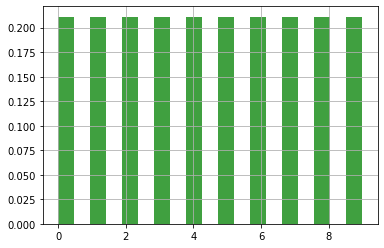

In [ ]:
plt.hist(trainloader.dataset.targets, 19, density=True, facecolor='g', alpha=0.75)
plt.grid(True)
plt.show()

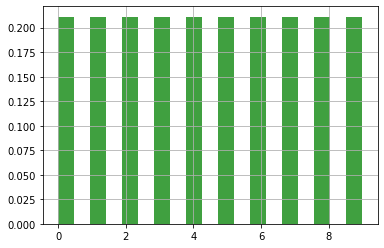

In [ ]:
plt.hist(testloader.dataset.targets, 19, density=True, facecolor='g', alpha=0.75)
plt.grid(True)
plt.show()

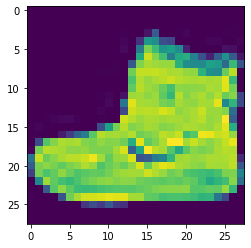

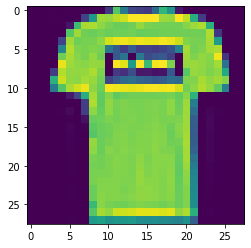

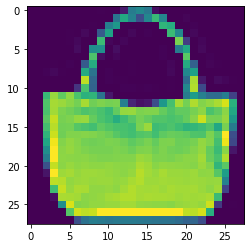

In [ ]:
for i in [0, 1, 100]:
    plt.imshow(trainloader.dataset.data[i])
    plt.show()

# Многослойная нейронную сеть MLP

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [ ]:
def define_model():

  model = Sequential()

  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])

  return model

In [ ]:
import tensorflow as tf

X_test = tf.convert_to_tensor(testset.data.reshape(10000, 28, 28, 1).numpy())
X_train = tf.convert_to_tensor(trainset.data.reshape(60000, 28, 28, 1).numpy())
y_test = tf.convert_to_tensor(testset.targets.numpy())
y_train = tf.convert_to_tensor(trainset.targets.numpy())

In [ ]:
base_model = define_model()

In [ ]:
save = base_model.fit(X_train, y_train,
              batch_size=128,
              epochs=25,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/25
469/469 [==============================] - 5s 4ms/step - loss: 1.0276 - accuracy: 0.7249 - val_loss: 0.5907 - val_accuracy: 0.7793
Epoch 2/25
469/469 [==============================] - 2s 3ms/step - loss: 0.5186 - accuracy: 0.8050 - val_loss: 0.4947 - val_accuracy: 0.8258
Epoch 3/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4417 - accuracy: 0.8396 - val_loss: 0.4503 - val_accuracy: 0.8416
Epoch 4/25
469/469 [==============================] - 1s 3ms/step - loss: 0.3957 - accuracy: 0.8562 - val_loss: 0.4384 - val_accuracy: 0.8428
Epoch 5/25
469/469 [==============================] - 2s 3ms/step - loss: 0.3725 - accuracy: 0.8653 - val_loss: 0.4553 - val_accuracy: 0.8414
Epoch 6/25
469/469 [==============================] - 2s 3ms/step - loss: 0.3551 - accuracy: 0.8711 - val_loss: 0.4044 - val_accuracy: 0.8525
Epoch 7/25
469/469 [==============================] - 1s 3ms/step - loss: 0.3388 - accuracy: 0.8754 - val_loss: 0.4251 - val_accuracy: 0.8514
Epoch 

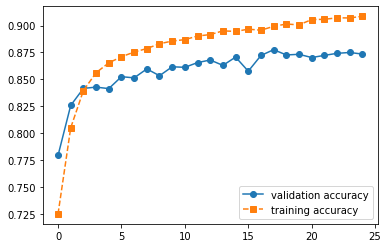

In [ ]:
plt.plot(save.history['val_accuracy'], '-o', label='validation accuracy')
plt.plot(save.history['accuracy'], '--s', label='training accuracy')
plt.legend();

In [ ]:
base_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3967 - accuracy: 0.8735


[0.3967485725879669, 0.8734999895095825]

# Свёрточная сеть

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dropout

In [ ]:
def define_model():

  model = Sequential()

  model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=X_train[0].shape,))
  model.add(Conv2D(128, 
                 kernel_size=(3, 3), 
                 activation='relu',padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(256, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=X_train[0].shape))
  model.add(Conv2D(128, 
                 kernel_size=(8, 8), 
                 padding='same',
                 activation='relu',
                 kernel_initializer='he_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(512, kernel_size=(5, 5),
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same',
                 input_shape=X_train[0].shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(256, kernel_size=(5, 5),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=X_train[0].shape))

  model.add(Flatten())
  model.add(Dense(2048, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])

  return model

In [ ]:
X_test = tf.convert_to_tensor(testset.data.reshape(10000, 28, 28, 1).numpy())
X_train = tf.convert_to_tensor(trainset.data.reshape(60000, 28, 28, 1).numpy())
y_test = tf.convert_to_tensor(testset.targets.numpy())
y_train = tf.convert_to_tensor(trainset.targets.numpy())

In [ ]:
base_model = define_model()

In [ ]:
save2 = base_model.fit(X_train, y_train,epochs = 8, batch_size=128,validation_data=(X_test,y_test))

Epoch 1/8
469/469 [==============================] - 42s 75ms/step - loss: 0.6376 - accuracy: 0.7825 - val_loss: 0.4281 - val_accuracy: 0.8458
Epoch 2/8
469/469 [==============================] - 34s 72ms/step - loss: 0.3355 - accuracy: 0.8803 - val_loss: 0.3137 - val_accuracy: 0.8891
Epoch 3/8
469/469 [==============================] - 34s 73ms/step - loss: 0.2822 - accuracy: 0.8989 - val_loss: 0.2747 - val_accuracy: 0.9021
Epoch 4/8
469/469 [==============================] - 35s 74ms/step - loss: 0.2565 - accuracy: 0.9100 - val_loss: 0.2508 - val_accuracy: 0.9104
Epoch 5/8
469/469 [==============================] - 35s 74ms/step - loss: 0.2353 - accuracy: 0.9177 - val_loss: 0.2536 - val_accuracy: 0.9109
Epoch 6/8
469/469 [==============================] - 35s 74ms/step - loss: 0.2192 - accuracy: 0.9230 - val_loss: 0.2260 - val_accuracy: 0.9230
Epoch 7/8
469/469 [==============================] - 35s 75ms/step - loss: 0.2061 - accuracy: 0.9287 - val_loss: 0.2193 - val_accuracy: 0.9233

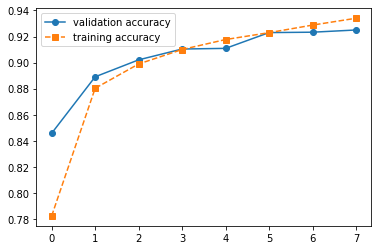

In [ ]:
plt.plot(save2.history['val_accuracy'], '-o', label='validation accuracy')
plt.plot(save2.history['accuracy'], '--s', label='training accuracy')
plt.legend();

In [ ]:
base_model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2185 - accuracy: 0.9251


[0.21845728158950806, 0.9251000285148621]